In [68]:
from scipy.io import wavfile
sampling_rate, audio_samples = wavfile.read('X.wav')
print(sampling_rate)

16000


In [69]:
print(audio_samples)

[466 660 465 ...   8  10   7]


In [70]:
type(audio_samples)

numpy.ndarray

In [71]:
audio_samples.shape

(63488,)

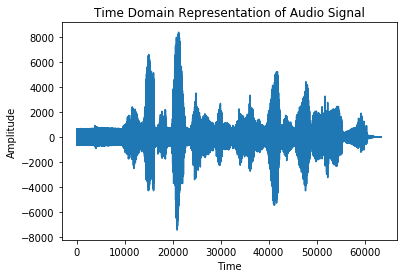

In [72]:
from matplotlib import pyplot as plt
plt.plot(audio_samples);
plt.ylabel('Amplitude');
plt.xlabel('Time');
plt.title('Time Domain Representation of Audio Signal');

In [73]:
N=int(input('Choose a value for N'))

Choose a value for N3968


In [74]:
import numpy as np

dft_matrix=[]
for freq in range(0,N):
    ind_comp=[]
    for n in range(0,N):
        ind_comp.append(np.exp(-2j*np.pi*freq*n/N))
    dft_matrix.append(ind_comp)

In [75]:
dft_matrix=np.array(dft_matrix)

In [76]:
dft_matrix.shape

(3968, 3968)

In [77]:
dft_matrix.real

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99999875, 0.99999499, ..., 0.99998872, 0.99999499,
        0.99999875],
       [1.        , 0.99999499, 0.99997994, ..., 0.99995487, 0.99997994,
        0.99999499],
       ...,
       [1.        , 0.99998872, 0.99995487, ..., 0.99989845, 0.99995487,
        0.99998872],
       [1.        , 0.99999499, 0.99997994, ..., 0.99995487, 0.99997994,
        0.99999499],
       [1.        , 0.99999875, 0.99999499, ..., 0.99998872, 0.99999499,
        0.99999875]])

In [78]:
dft_matrix.imag

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.00158346, -0.00316692, ...,  0.00475037,
         0.00316692,  0.00158346],
       [ 0.        , -0.00316692, -0.00633381, ...,  0.00950064,
         0.00633381,  0.00316692],
       ...,
       [ 0.        ,  0.00475037,  0.00950064, ..., -0.01425069,
        -0.00950064, -0.00475037],
       [ 0.        ,  0.00316692,  0.00633381, ..., -0.00950064,
        -0.00633381, -0.00316692],
       [ 0.        ,  0.00158346,  0.00316692, ..., -0.00475037,
        -0.00316692, -0.00158346]])

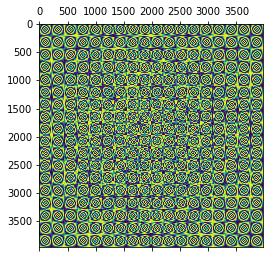

In [79]:
#plt.imshow(dft_matrix.real,origin='lower',aspect='auto');
plt.matshow(dft_matrix.real,aspect='auto');

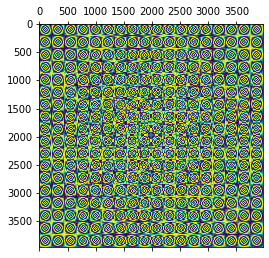

In [80]:
plt.matshow(dft_matrix.imag,aspect='auto');

In [81]:
N

3968

In [82]:
hann_window=[]
for i in range(0,N):
    hann_window.append(np.sin(np.pi*i/N)**2)


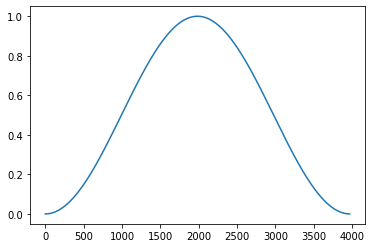

In [83]:
plt.plot(hann_window);

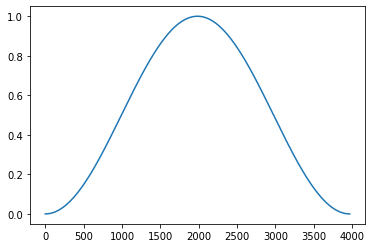

In [84]:
plt.plot(np.hanning(N));

In [85]:
hann_window

[0.0,
 6.268394598109176e-07,
 2.5073562675328373e-06,
 5.6415457080372e-06,
 1.0029399922789541e-05,
 1.5670907909869204e-05,
 2.2566055523996893e-05,
 3.0714825476570214e-05,
 4.0117197335706914e-05,
 5.0773147526296236e-05,
 6.268264933005794e-05,
 7.584567288560921e-05,
 9.026218518853994e-05,
 0.00010593215009149486,
 0.0001228555283042646,
 0.00014103227739388418,
 0.00016046235178473938,
 0.00018114570275868074,
 0.00020308227845514603,
 0.0002262720238712903,
 0.0002507148808621236,
 0.00027641078814065673,
 0.000303359681278055,
 0.00033156149270380036,
 0.0003610161517058597,
 0.00039172358443086266,
 0.0004236837138842873,
 0.0004568964599306524,
 0.0004913617392937189,
 0.0005270794655566981,
 0.0005640495491624691,
 0.0006022718974138037,
 0.0006417464144735964,
 0.0006824730013651079,
 0.0007244515559722114,
 0.0007676819730396482,
 0.000812164144173294,
 0.0008578979578404279,
 0.0009048832993700138,
 0.0009531200509529873,
 0.0010026080916425513,
 0.0010533472973544783,

In [86]:
X=[]
for i in range(1,32):
    trans_frame=np.multiply(hann_window,audio_samples[(i-1)*1984:(i+1)*1984])
    X.append(trans_frame)

X=np.array(X)

In [87]:
X.shape

(31, 3968)

In [88]:
X[0]

array([ 0.00000000e+00,  4.13714043e-04,  1.16592066e-03, ...,
       -3.92651581e-03, -1.00294251e-03,  7.52207352e-05])

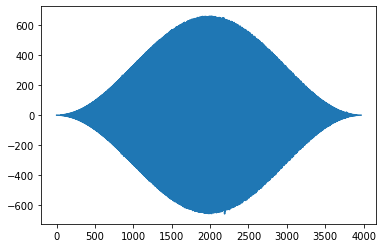

In [89]:
plt.plot(X[0])

In [90]:
X=X.T

In [91]:
X.shape

(3968, 31)

In [92]:
spect=np.dot(dft_matrix,X)

In [93]:
spect

array([[ 4928.48437934  +0.j        ,  2579.0419539   +0.j        ,
         2290.68414664  +0.j        , ..., -1104.18934184  +0.j        ,
         -991.05865703  +0.j        ,  3095.20413437  +0.j        ],
       [-2706.26499791-496.39167026j, -1255.8455295 -394.88034748j,
        -1221.4000431 +124.39040974j, ...,   453.43856035-431.50322944j,
          668.21355336+261.93061297j, -2074.7429968 +396.16476052j],
       [  331.47096398+199.10332743j,    63.35205225 +19.71003094j,
          239.20119421 +75.80091308j, ...,   125.79027828+280.31369739j,
          622.35738242+577.11792397j,    12.77785278+434.99820469j],
       ...,
       [ -210.25690561 +74.00733069j,  -108.61112374-159.67038692j,
         -198.8787039 +187.19108942j, ...,   323.41769495+234.07527193j,
        -1023.42252238  -3.69593016j,  1455.51380948 -73.58761474j],
       [  331.47096398-199.10332743j,    63.35205225 -19.71003094j,
          239.20119421 -75.80091308j, ...,   125.79027828-280.31369739j,
       

In [94]:
mag_spect=np.abs(spect)

In [95]:
mag_spect.shape

(3968, 31)

In [96]:
mag_spect

array([[4928.48437934, 2579.0419539 , 2290.68414664, ..., 1104.18934184,
         991.05865703, 3095.20413437],
       [2751.41326035, 1316.46438721, 1227.71781746, ...,  625.94054432,
         717.71651709, 2112.22750201],
       [ 386.67186988,   66.34732733,  250.92427092, ...,  307.24414243,
         848.76016025,  435.18583571],
       ...,
       [ 222.90143865,  193.10880006,  273.11763551, ...,  399.23707034,
        1023.429196  , 1457.3728372 ],
       [ 386.67186988,   66.34732733,  250.92427092, ...,  307.24414242,
         848.76016025,  435.18583571],
       [2751.41326032, 1316.46438717, 1227.71781743, ...,  625.94054432,
         717.71651709, 2112.22750201]])

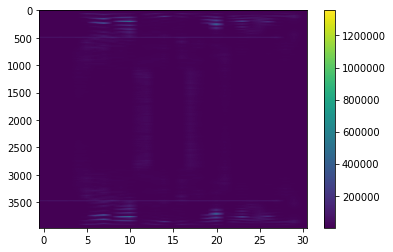

In [97]:
plt.imshow(mag_spect,aspect='auto',interpolation='bilinear');
plt.colorbar();

<Figure size 576x576 with 0 Axes>

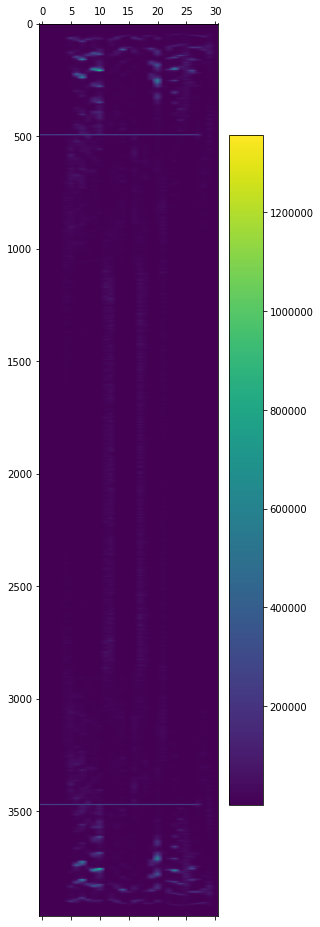

In [98]:
import numpy as np
import matplotlib.pyplot as plt

w=101
h=10
fig=plt.figure(figsize=(8, 8))
plt.matshow(mag_spect,aspect='auto',interpolation='bilinear');
plt.colorbar()

In [99]:
mag_spect.shape

(3968, 31)

In [100]:
mag_spect[499]=[0]*31

<Figure size 576x576 with 0 Axes>

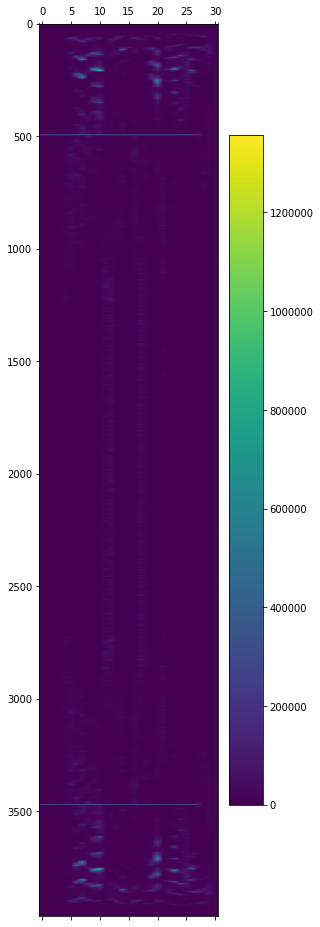

In [101]:
import numpy as np
import matplotlib.pyplot as plt

w=101
h=10
fig=plt.figure(figsize=(8, 8))
plt.matshow(mag_spect,aspect='auto',interpolation='bilinear');
plt.colorbar()

In [102]:
mag_spect[480:500]

array([[8.89209725e+01, 8.03374707e+02, 9.47148897e+03, 2.28244430e+03,
        1.39819867e+03, 6.16668377e+03, 1.26232751e+04, 6.51518283e+04,
        2.85682951e+04, 6.77745947e+03, 7.27469428e+04, 6.14226029e+03,
        6.21139932e+03, 5.63186480e+03, 1.58874774e+04, 2.17440659e+03,
        7.00292575e+03, 5.63816069e+03, 5.04165311e+03, 1.22859094e+03,
        8.72673904e+03, 2.87860827e+03, 1.20586474e+03, 6.43376608e+02,
        3.81755726e+04, 9.81792281e+03, 1.63972059e+03, 1.30789611e+04,
        2.92625492e+03, 5.47355568e+03, 1.87910009e+03],
       [8.33436108e+01, 2.77474187e+03, 8.90865681e+03, 1.22251876e+03,
        1.74928278e+03, 5.34868165e+03, 1.06945177e+04, 5.32804201e+04,
        3.01252035e+04, 2.78075114e+04, 3.06957765e+04, 1.89904414e+03,
        1.95123104e+03, 6.63811602e+03, 1.40519790e+04, 2.58253278e+03,
        6.78347527e+03, 2.80493735e+03, 1.88136290e+03, 2.39359287e+03,
        7.25498685e+03, 1.59720888e+03, 1.45353213e+03, 7.77629475e+02,
       

In [103]:
mag_spect[495]=[0]*31

In [104]:
mag_spect[495]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [105]:
mag_spect[496]

array([6.50297073e+05, 6.45703069e+05, 6.48953600e+05, 6.49568344e+05,
       6.54880848e+05, 6.57769606e+05, 6.53557509e+05, 6.68395001e+05,
       6.32706156e+05, 6.52174912e+05, 6.73776732e+05, 6.51071466e+05,
       6.55841427e+05, 6.55430973e+05, 6.53586515e+05, 6.50690427e+05,
       6.55878465e+05, 6.51662253e+05, 6.54428521e+05, 6.52487537e+05,
       6.52226086e+05, 6.50069896e+05, 6.49567874e+05, 6.44944872e+05,
       6.44924400e+05, 6.49609636e+05, 6.49037906e+05, 2.41348289e+05,
       1.29876207e+02, 1.80228678e+04, 5.11428165e+03])

In [106]:
mag_spect[496]=[0]*31

In [107]:
mag_spect[496]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [108]:
mag_spect[497]

array([3.25079877e+05, 3.21321827e+05, 3.28792911e+05, 3.24932979e+05,
       3.25735489e+05, 3.32218231e+05, 3.30807622e+05, 3.41814884e+05,
       3.19444213e+05, 3.23380856e+05, 3.44360068e+05, 3.28184730e+05,
       3.23968713e+05, 3.27905138e+05, 3.28836709e+05, 3.26711577e+05,
       3.32909068e+05, 3.31835888e+05, 3.21291059e+05, 3.25505147e+05,
       3.16989301e+05, 3.28746205e+05, 3.26028316e+05, 3.25582800e+05,
       3.23622747e+05, 3.26836117e+05, 3.25697579e+05, 2.03171147e+05,
       2.83447333e+02, 1.95294023e+04, 2.73372141e+03])

In [109]:
mag_spect[497]=[0]*31

<Figure size 576x576 with 0 Axes>

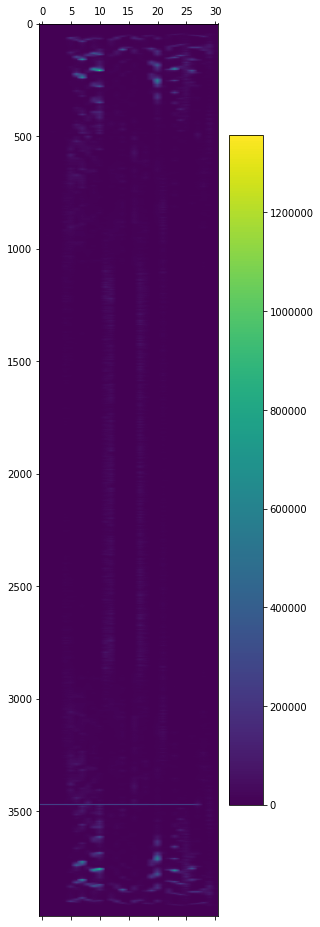

In [110]:
import numpy as np
import matplotlib.pyplot as plt

w=101
h=10
fig=plt.figure(figsize=(8, 8))
plt.matshow(mag_spect,aspect='auto',interpolation='bilinear');
plt.colorbar()

In [111]:
for i in range(3400,3500,10):
    print(mag_spect[i:i+10,0])
    print('%g'%i,max(mag_spect[i:i+10,0]))

[333.54538612 183.0156366  177.40765128 214.76762756 235.25675561
  15.32687568 314.82282175 285.55180877 172.51810338  64.52805609]
3400 333.54538612171353
[ 64.80312559 126.83071234 110.94793868  45.46488164  51.8216911
 131.52507238  65.34685594 229.70555612  99.03592302 111.75319638]
3410 229.70555612098119
[110.81313097 132.13124549  76.58756979 109.44832881 108.62028489
  20.24114348  82.33519534 145.89696531 208.55584799 234.21853867]
3420 234.2185386688753
[204.5858921   84.70314474 129.98102118  53.76735176  74.30592733
  84.98464137 187.68645243 131.88061898  99.72371218 206.43623961]
3430 206.43623961239112
[107.37627197  57.36598428  71.25651636 116.99502333 177.79577008
 151.47565352 117.40504591  33.35636477  68.38183105 145.79771727]
3440 177.79577007909117
[ 96.80676095  52.62891053  93.15597365  35.01470816  52.928939
 139.83097783  43.28945046 129.34950783  83.8523759   52.91793281]
3450 139.83097782787314
[ 38.05862312  37.25385175 221.02188869 181.30491329   1.70978

In [112]:
mag_spect[3471]=[0]*31

In [113]:
mag_spect[3472]=[0]*31

In [114]:
mag_spect[3473]=[0]*31

<Figure size 576x576 with 0 Axes>

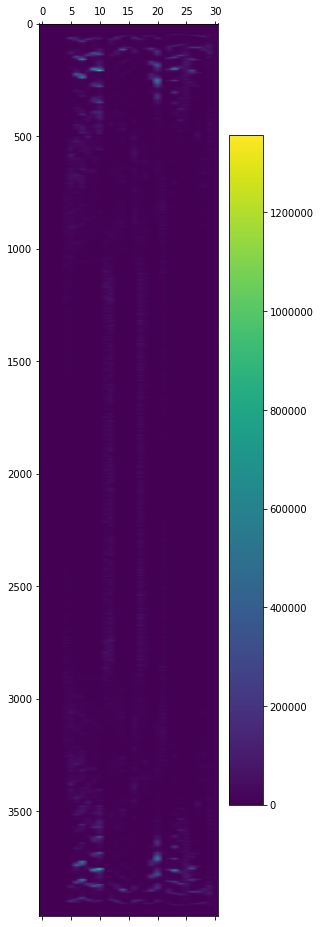

In [115]:
import numpy as np
import matplotlib.pyplot as plt

w=101
h=10
fig=plt.figure(figsize=(8, 8))
plt.matshow(mag_spect,aspect='auto',interpolation='bilinear');
plt.colorbar()

In [116]:
N

3968

In [117]:
#Calculating inverse DFT matrix
#import numpy as np

idft_matrix=[]
for freq in range(0,N):
    ind_comp=[]
    for n in range(0,N):
        ind_comp.append(np.exp(2j*np.pi*(n/N)*freq))
    idft_matrix.append(ind_comp)

In [118]:
idft_matrix=np.array(idft_matrix)

In [119]:
idft_matrix.shape

(3968, 3968)

In [120]:
dft_matrix.dot(idft_matrix)

array([[ 3.96800000e+03+0.00000000e+00j,  2.27373675e-13-9.94759830e-14j,
        -2.98427949e-13+1.88293825e-13j, ...,
         4.67821337e-11+3.92930133e-12j,  1.52681423e-10-1.06581410e-14j,
         4.55997906e-10-9.81970061e-12j],
       [ 2.55795385e-13+4.97379915e-14j,  3.96800000e+03-2.22044605e-14j,
         1.27897692e-13-1.38555833e-13j, ...,
         3.37934125e-11+2.20978791e-12j,  9.85949100e-11+8.98126018e-12j,
         2.29917418e-10-1.00754960e-11j],
       [-3.55271368e-13+1.06581410e-13j,  1.27897692e-13+7.99360578e-14j,
         3.96800000e+03-1.84741111e-13j, ...,
         2.99849034e-11+1.57740487e-12j,  6.94342361e-11+7.60280727e-13j,
         1.51175072e-10-5.44986278e-12j],
       ...,
       [ 4.88284968e-11+1.70530257e-12j,  4.49915660e-11-8.66862138e-13j,
         1.80619963e-11-4.76063633e-13j, ...,
         3.96800000e+03+1.03028697e-12j, -1.49086077e-10-5.94013727e-12j,
        -1.67133862e-10-1.29141142e-11j],
       [-1.38172140e-10+7.61701813e-12j, -8.

In [121]:
mag_spect.shape

(3968, 31)

In [122]:
clean_X=np.copy(mag_spect)

In [123]:
inv_spect=1/N*idft_matrix.dot(clean_X)

In [124]:
inv_spect

array([[ 167.09868194+0.j        , 1506.19042615+0.j        ,
         727.16812303+0.j        , ..., 4183.61857681+0.j        ,
        6302.07603113+0.j        , 1046.79992951+0.j        ],
       [ -25.00748768-0.01801847j,  225.81598128-0.78059439j,
         246.18735397-0.12513858j, ..., 2509.91041416-0.27594352j,
        4742.96337624-3.82857879j,  762.41010739-0.29031968j],
       [  22.01823248-0.02536062j, -398.33500773-1.09867064j,
         -70.63535782-0.17612999j, ...,  294.27531968-0.38838486j,
        2241.66981971-5.3886464j ,  494.57981977-0.40861902j],
       ...,
       [   9.29184503+0.01767609j, -120.79916718+0.76576209j,
         -76.89638481+0.12276078j, ...,   34.04045832+0.27070024j,
         589.62256679+3.75583088j,  232.87957435+0.28480324j],
       [  22.01823248+0.02536062j, -398.33500773+1.09867064j,
         -70.63535782+0.17612999j, ...,  294.27531968+0.38838486j,
        2241.66981971+5.3886464j ,  494.57981977+0.40861902j],
       [ -25.00748768+0.0180

In [125]:
inv_spect.imag

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.01801847, -0.78059439, -0.12513858, ..., -0.27594352,
        -3.82857879, -0.29031968],
       [-0.02536062, -1.09867064, -0.17612999, ..., -0.38838486,
        -5.3886464 , -0.40861902],
       ...,
       [ 0.01767609,  0.76576209,  0.12276078, ...,  0.27070024,
         3.75583088,  0.28480324],
       [ 0.02536062,  1.09867064,  0.17612999, ...,  0.38838486,
         5.3886464 ,  0.40861902],
       [ 0.01801847,  0.78059439,  0.12513858, ...,  0.27594352,
         3.82857879,  0.29031968]])

In [126]:
inv_spect.real.shape

(3968, 31)

In [127]:
recovered_signal=inv_spect.real[:,0].T

In [128]:
recovered_signal.shape

(3968,)

In [129]:
type(recovered_signal)
#recovered_signal=list(recovered_signal)

numpy.ndarray

In [130]:
for i in range(1,31):
    recovered_signal[-1985:-1]+=np.transpose(inv_spect.real[:,i])[:1984]
    #recovered_signal.append(np.transpose(inv_spect[:,i])[1984:])
    recovered_signal=np.append(recovered_signal,np.transpose(inv_spect.real[:,i])[1984:])

In [131]:
recovered_signal.shape

(63488,)

In [132]:
recovered_signal.dtype

dtype('float64')

In [133]:
recovered_signal=recovered_signal.astype('int16')

In [134]:
import IPython.display as ipd


ipd.Audio(recovered_signal, rate=16000) # load a NumPy array
